# Taller Integral de Análisis Probabilístico

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Datos de ejemplo
tiempos = np.array([120, 150, 300, 500, 800]).reshape(-1, 1)

# Normalización (Min-Max)
minmax_scaler = MinMaxScaler()
tiempos_normalizados = minmax_scaler.fit_transform(tiempos)

# Estandarización (Z-score)
standard_scaler = StandardScaler()
tiempos_estandarizados = standard_scaler.fit_transform(tiempos)

# Mostrar resultados
df = pd.DataFrame({
    'Original (ms)': tiempos.flatten(),
    'Normalizado [0,1]': tiempos_normalizados.flatten(),
    'Estandarizado (Z-score)': tiempos_estandarizados.flatten()
})

print(df)


   Original (ms)  Normalizado [0,1]  Estandarizado (Z-score)
0            120           0.000000                -1.007937
1            150           0.044118                -0.888889
2            300           0.264706                -0.293651
3            500           0.558824                 0.500000
4            800           1.000000                 1.690476


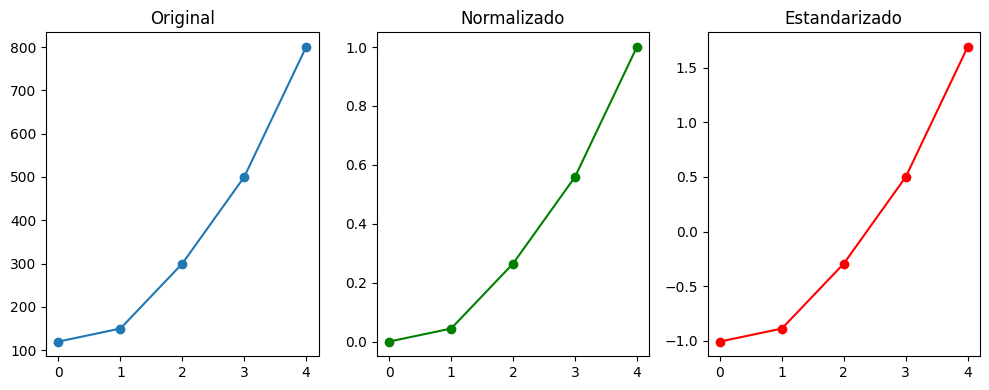

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.plot(tiempos, 'o-')

plt.subplot(1, 3, 2)
plt.title("Normalizado")
plt.plot(tiempos_normalizados, 'o-g')

plt.subplot(1, 3, 3)
plt.title("Estandarizado")
plt.plot(tiempos_estandarizados, 'o-r')

plt.tight_layout()
plt.show()


**¿Qué pasó?**
1. **Normalización:**
El mínimo 120 ms es 0, el máximo 800 ms es 1.
Todo queda entre 0 y 1, pero pierdes la interpretación estadística (no sabes si 0.5 es "bueno" o "malo" sin contexto).

2. **Estandarización:**
La media ahora es 0 y la desviación estándar es 1.
Sabes que 120 ms está a -1.01 desviaciones de la media → útil en análisis probabilístico (por ejemplo, para calcular probabilidades con la distribución normal).

# Simulación de los datos

Vamos a crear este dataframe en Python para que lo podamos normalizar y estandarizar.

In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

# Datos reales simulados de tiempos de respuesta en ms
np.random.seed(42)  # Para reproducibilidad

data = {
    'USA': np.random.randint(120, 180, 10),
    'Europa': np.random.randint(300, 400, 10),
    'Asia': np.random.randint(480, 520, 10),
    'Sudamérica': np.random.randint(800, 950, 10),
    'África': np.random.randint(900, 1000, 10)
}

df = pd.DataFrame(data)
print("Datos Originales:")
print(df)


Datos Originales:
   USA  Europa  Asia  Sudamérica  África
0  158     386   503         858     972
1  171     374   509         814     938
2  148     374   517         850     917
3  134     387   481         907     903
4  162     399   500         854     988
5  127     323   512         863     959
6  140     302   491         930     913
7  158     321   501         850     908
8  177     352   504         934     989
9  138     301   506         820     952


### Normalización Min-Max
Escalamos los datos al rango [0, 1] para compararlos en igualdad de condiciones. Esto es clave cuando los modelos de Machine Learning son sensibles a la escala.

In [8]:
minmax_scaler = MinMaxScaler()
df_normalizado = pd.DataFrame(minmax_scaler.fit_transform(df), columns=df.columns)

print("\n Datos Normalizados (Min-Max):")
print(df_normalizado)




 Datos Normalizados (Min-Max):
    USA    Europa      Asia  Sudamérica    África
0  0.62  0.867347  0.611111    0.366667  0.802326
1  0.88  0.744898  0.777778    0.000000  0.406977
2  0.42  0.744898  1.000000    0.300000  0.162791
3  0.14  0.877551  0.000000    0.775000  0.000000
4  0.70  1.000000  0.527778    0.333333  0.988372
5  0.00  0.224490  0.861111    0.408333  0.651163
6  0.26  0.010204  0.277778    0.966667  0.116279
7  0.62  0.204082  0.555556    0.300000  0.058140
8  1.00  0.520408  0.638889    1.000000  1.000000
9  0.22  0.000000  0.694444    0.050000  0.569767


### Estandarización (Z-score)
Aquí centramos en la media 0 y escalamos por la desviación estándar. Esto es ideal cuando queremos hacer análisis probabilísticos, por ejemplo, calcular probabilidades en una distribución normal estándar.

In [9]:
standard_scaler = StandardScaler()
df_estandarizado = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns)

print("\n Datos Estandarizados (Z-score):")
print(df_estandarizado)



 Datos Estandarizados (Z-score):
        USA    Europa      Asia  Sudamérica    África
0  0.427341  0.966006  0.061224   -0.250706  0.900525
1  1.256511  0.626062  0.673469   -1.353813 -0.189078
2 -0.210482  0.626062  1.489796   -0.451271 -0.862069
3 -1.103434  0.994334 -2.183673    0.977754 -1.310729
4  0.682471  1.334278 -0.244898   -0.350989  1.413280
5 -1.549910 -0.818697  0.979592   -0.125353  0.483912
6 -0.720740 -1.413598 -1.163265    1.554378 -0.990257
7  0.427341 -0.875354 -0.142857   -0.451271 -1.150493
8  1.639205  0.002833  0.163265    1.654660  1.445327
9 -0.848305 -1.441926  0.367347   -1.203389  0.259582


### Comparación Visual
Para que vamos claramente las diferencias, generamos los gráficos.

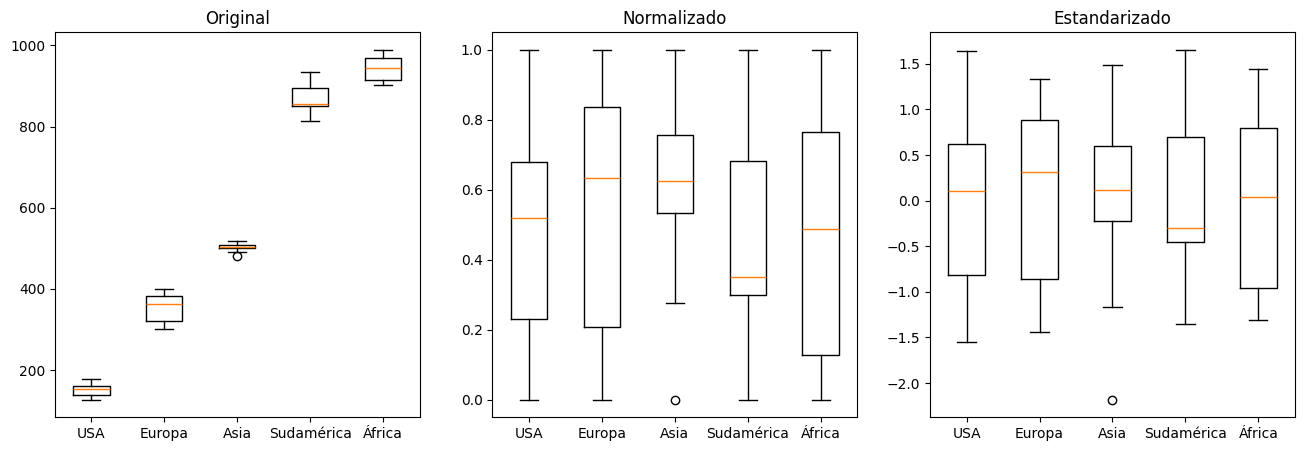

In [10]:
plt.figure(figsize=(16,5))

# Original
plt.subplot(1,3,1)
plt.title('Original')
plt.boxplot(df.values)
plt.xticks(range(1, 6), df.columns)

# Normalizado
plt.subplot(1,3,2)
plt.title('Normalizado')
plt.boxplot(df_normalizado.values)
plt.xticks(range(1, 6), df.columns)

# Estandarizado
plt.subplot(1,3,3)
plt.title('Estandarizado')
plt.boxplot(df_estandarizado.values)
plt.xticks(range(1, 6), df.columns)

plt.show()


Interpretación de Resultados

| Técnica | ¿Qué hizo? | ¿Cuándo la usamos? |
|:----------|:--------|:--------|
| Normalizar | Llevó todos los tiempos a un rango [0, 1], manteniendo la relación relativa. | Cuando las unidades o escalas son diferentes, como en redes neuronales. |
| Estandarizar | Centró los datos alrededor de la media 0 y desviación 1; ahora son comparables en desviaciones estándar. |	Cuando necesitamos comparar valores relativos o aplicar modelos estadísticos, como regresión o PCA. |

**Errores Comunes (en el mundo real):**

1. Aplicar normalización cuando los datos tienen outliers extremos (el rango 0-1 se deforma).
2. Asumir que los datos estandarizados son siempre normales (NO garantiza normalidad).
3. No tener en cuenta el contexto del problema. Por ejemplo, en finanzas muchas veces se usa estandarización; en redes neuronales, normalización.

## Taller

Nombre del Dataset: Encuesta de Hábitos de Consumo y Salud Estudiantil 2024

**Variables:**
- Edad: Edad del estudiante.
- Sexo: Masculino/Femenino.
- Horas_Estudio: Promedio de horas de estudio semanal.
- Horas_Sueño: Promedio de horas de sueño diario.
- Consumo_Cafe: Tazas de café al día.
- Nota_Probabilidad: Nota obtenida en la primera evaluación del curso.
- Asistencia: Porcentaje de asistencia a clase.
- Fuma: Sí/No.
- Actividad_Fisica: Horas semanales de actividad física.

**Actividades del Taller**
1. Análisis Descriptivo (Semanas 1 y 2)
- Realiza un análisis descriptivo completo del dataset:
- Calcular media, mediana, moda, desviación estándar y varianza para las variables Edad, Horas_Estudio, Horas_Sueño y Nota_Probabilidad.
- Generar gráficos de distribución: histogramas y diagramas de caja.
- Interpretar asimetría y curtosis.

2. Probabilidad Clásica y Frecuencial (Semanas 3 y 4)
- Determina el espacio muestral para el evento "Estudiantes que consumen más de 2 tazas de café y duermen menos de 6 horas".
- Calcula:
    * Probabilidad de que un estudiante no fume y tenga asistencia > 80%.
    * Probabilidad de que un estudiante fume o tenga nota > 3.5.
    * Probabilidad condicional: P(Consumo_Cafe > 2 | Fuma = "Sí").
- Errores Comunes:
No diferenciar entre eventos mutuamente excluyentes e independientes.
Confundir probabilidad simple y condicional.

3. Combinaciones y Permutaciones (Semana 4)
- ¿Cuántas combinaciones posibles hay para formar grupos de 3 estudiantes que no fumen?
- ¿Cuántas permutaciones posibles si ordenamos a los 5 estudiantes con mejor nota para una presentación?

4. Distribución Binomial (Semana 5)
- Supón que:
    * La probabilidad de que un estudiante entregue un taller completo es del 70%.
    * Se seleccionan 10 estudiantes al azar.
- Realiza:
    * Cálculo de la probabilidad de que exactamente 7 estudiantes entreguen el taller.
    * Cálculo de la probabilidad de que al menos 8 lo entreguen.
    * Esperanza matemática y varianza de la distribución.

5. Distribución Normal (Semana 6)
- La variable Horas_Estudio sigue una distribución normal con $μ = 10$ y $σ = 2$.
- Calcula la probabilidad de que un estudiante:
    * Estudie más de 12 horas a la semana.
    * Estudie entre 8 y 12 horas.
- Determina el valor Z para una Horas_Estudio = 14.

6. Distribución Geométrica (Semana 7)
- Probabilidad de que el primer estudiante que entrega el taller correctamente sea el tercero en intentarlo, si la probabilidad de éxito es 0.4.
- Calcula la esperanza y varianza de la distribución geométrica.

7. Distribución Hipergeométrica (Semana 8)
- Hay 30 estudiantes, 12 de ellos tienen asistencia perfecta (>90%).
- Si se seleccionan al azar 5 estudiantes, ¿cuál es la probabilidad de que exactamente 3 tengan asistencia perfecta?

**Análisis y Conclusiones**

1. Análisis Crítico de Resultados:
- ¿Qué patrones observas en las variables relacionadas con el rendimiento académico?
- ¿Existe relación entre consumo de café y horas de sueño?
- ¿Qué distribución se ajusta mejor a Horas_Estudio?

2. Errores Típicos Identificados:
- Interpretación incorrecta de la probabilidad condicional.
- Uso incorrecto de parámetros en las distribuciones.
- Mala identificación del tipo de distribución de probabilidad a utilizar.


,count,mean,std,min,25%,50%,75%,max,varianza,moda
Edad,100.0,24.040,3.504456,18.0,21.000,24.0,27.000,29.0,12.281212,29.0
Horas_Estudio,100.0,9.996,2.035985,4.2,8.775,10.0,11.425,14.5,4.145236,10.0
Horas_Sueño,100.0,6.471,1.593059,3.5,5.400,6.3,7.400,11.3,2.537837,6.3
Nota_Probabilidad,100.0,3.613,0.589925,2.2,3.300,3.7,3.900,5.1,0.348011,3.8


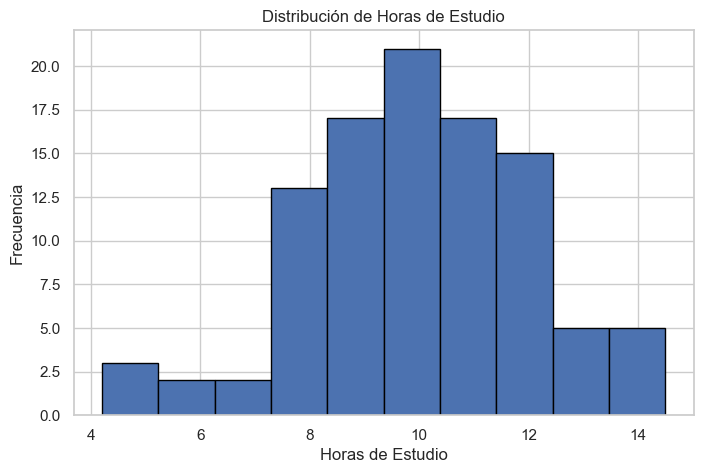

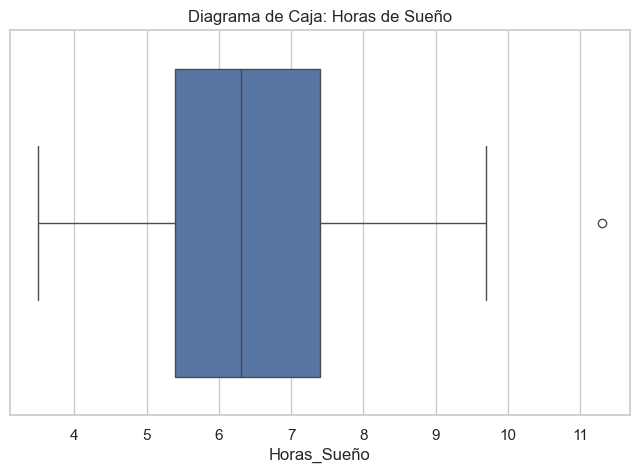

0.19 0.35 0.69 0.12
67525 120
0.26682793200000005 0.38278278639999985 7.0 2.1000000000000005
0.15865525393145707 0.6826894921370859 2.0
0.2362005810281672


In [15]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import binom, norm, geom, hypergeom

# Configuración visual
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

# Dataset
np.random.seed(42)
n = 100
data = pd.DataFrame({
    'Edad': np.random.randint(18, 30, size=n),
    'Sexo': np.random.choice(['Masculino', 'Femenino'], size=n),
    'Horas_Estudio': np.random.normal(10, 2, size=n).round(1),
    'Horas_Sueño': np.random.normal(6.5, 1.5, size=n).round(1),
    'Consumo_Cafe': np.random.poisson(2, size=n),
    'Nota_Probabilidad': np.random.normal(3.5, 0.5, size=n).round(1),
    'Asistencia': np.random.uniform(60, 100, size=n).round(1),
    'Fuma': np.random.choice(['Sí', 'No'], size=n, p=[0.3, 0.7]),
    'Actividad_Fisica': np.random.randint(0, 10, size=n)
})

# PASO 1: Análisis Descriptivo
desc_stats = data[['Edad', 'Horas_Estudio', 'Horas_Sueño', 'Nota_Probabilidad']].describe().T
desc_stats['varianza'] = data[['Edad', 'Horas_Estudio', 'Horas_Sueño', 'Nota_Probabilidad']].var()
desc_stats['moda'] = data[['Edad', 'Horas_Estudio', 'Horas_Sueño', 'Nota_Probabilidad']].mode().iloc[0]
display(desc_stats)

# PASO 2: Histogramas y Diagramas de Caja
plt.hist(data['Horas_Estudio'], bins=10, edgecolor='black')
plt.title('Distribución de Horas de Estudio')
plt.xlabel('Horas de Estudio')
plt.ylabel('Frecuencia')
plt.show()

sns.boxplot(x=data['Horas_Sueño'])
plt.title('Diagrama de Caja: Horas de Sueño')
plt.show()

# PASO 3: Probabilidades básicas
# P(Consumo_Cafe > 2 y Horas_Sueño < 6)
evento_a = data[(data['Consumo_Cafe'] > 2) & (data['Horas_Sueño'] < 6)]
prob_a = len(evento_a) / n

# P(No fuma ∩ Asistencia > 80)
evento_b = data[(data['Fuma'] == 'No') & (data['Asistencia'] > 80)]
prob_b = len(evento_b) / n

# P(Fuma ∪ Nota > 3.5)
fumadores = data[data['Fuma'] == 'Sí']
nota_mayor_35 = data[data['Nota_Probabilidad'] > 3.5]
interseccion = data[(data['Fuma'] == 'Sí') & (data['Nota_Probabilidad'] > 3.5)]
prob_c = (len(fumadores) + len(nota_mayor_35) - len(interseccion)) / n

# P(Consumo_Cafe > 2 | Fuma = Sí)
fumadores_sub = data[data['Fuma'] == 'Sí']
condicional_d = len(fumadores_sub[fumadores_sub['Consumo_Cafe'] > 2]) / len(fumadores_sub)

print(prob_a, prob_b, prob_c, condicional_d)

# PASO 4: Combinaciones y Permutaciones
from math import comb, perm
combinaciones = comb(len(data[data['Fuma'] == 'No']), 3)
permutaciones = perm(5, 5)

print(combinaciones, permutaciones)

# PASO 5: Distribución Binomial
n_binom = 10
p_binom = 0.7

# P(X = 7)
prob_x7 = binom.pmf(7, n_binom, p_binom)

# P(X >= 8)
prob_x_ge_8 = binom.sf(7, n_binom, p_binom)

# Esperanza y varianza
esperanza_binom = n_binom * p_binom
varianza_binom = n_binom * p_binom * (1 - p_binom)

print(prob_x7, prob_x_ge_8, esperanza_binom, varianza_binom)

# PASO 6: Distribución Normal
mu_normal = 10
sigma_normal = 2

# P(X > 12)
z_12 = (12 - mu_normal) / sigma_normal
prob_mayor_12 = norm.sf(z_12)

# P(8 < X < 12)
z_8 = (8 - mu_normal) / sigma_normal
prob_entre_8_12 = norm.cdf(z_12) - norm.cdf(z_8)

# Valor Z para X = 14
z_14 = (14 - mu_normal) / sigma_normal

print(prob_mayor_12, prob_entre_8_12, z_14)

# PASO 7: Distribución Geométrica
p_geom = 0.4

# P(X = 3)
prob_x3_geom = geom.pmf(3, p_geom)

# Esperanza y varianza
esperanza_geom = 1 / p_geom
varianza_geom = (1 - p_geom) / (p_geom ** 2)

(prob_x3_geom, esperanza_geom, varianza_geom)

# PASO 8: Distribución Hipergeométrica
N_total = 30
K_exito = 12
n_extraidos = 5
x_deseados = 3

prob_x3_hipergeom = hypergeom.pmf(x_deseados, N_total, K_exito, n_extraidos)

print(prob_x3_hipergeom)
